In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
data=pd.read_csv("../../Downloads/ICD_podaci/ICD_podaci.csv")
data.shape
data

,ID,a1rr,a2rr,a1resp,a2resp,serr,seresp,SD1,SD2,C1,...,AF_pre_ugradnje,NYHA,HTA,DM,HLP,Pusenje,HOBP,Amiodaron,Trajanje_bolesti,Uzrok_smrti
0,1,0.33033,0.59555,1.14003,0.62236,0.7027,1.2696,0.155697,0.137827,0.485247,...,ne,II,ne,ne,da,da,ne,da,duze od 2 godine,NaN
1,2,0.83001,1.02056,1.00170,0.71357,1.4400,1.2323,0.015643,0.036038,0.576469,...,ne,III,ne,ne,ne,da,ne,ne,krace od 2 godine,nenaprasna srcana
2,3,1.01648,0.84051,0.82638,1.18445,1.4772,1.1310,0.009045,0.024197,0.482850,...,ne,II,ne,da,da,da,ne,da,krace od 2 godine,naprasna srcana
3,4,0.96463,0.98775,0.86280,0.92980,1.5199,1.7175,0.007548,0.022270,0.473247,...,ne,III,ne,da,da,da,da,ne,krace od 2 godine,NaN
4,5,0.66114,1.00050,1.52550,0.87245,1.1444,0.5685,0.016694,0.035815,0.537152,...,paroksizmalna,II,da,ne,ne,ne,ne,da,duze od 2 godine,nenaprasna nesrcana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,0.66770,0.57460,0.76690,0.88680,2.0160,1.5640,0.153348,0.141558,0.503139,...,permanentna,III,da,ne,ne,ne,ne,da,duze od 2 godine,nenaprasna srcana
102,103,0.60420,0.82220,0.58690,0.79660,1.6080,1.9250,0.039252,0.025911,0.518877,...,ne,II,da,da,da,da,ne,ne,duze od 2 godine,NaN
103,104,0.32270,0.59260,0.70090,0.89570,296.0000,1.2610,0.060644,0.038431,0.605464,...,ne,III,da,da,da,ne,ne,da,duze od 2 godine,nenaprasna srcana
104,105,1.22460,0.42980,0.40620,0.79190,833.0000,2.0210,0.044598,0.110026,0.648257,...,ne,III,da,ne,da,ne,ne,ne,duze od 2 godine,nenaprasna srcana


In [5]:
data.isna().sum().values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 80, 88,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 72])

In [6]:
data=data.dropna(axis=1)


In [7]:
data=data.replace({"da":1,"ne":0,"/":0,"paroksizmalna":1,"permanentna":1,"I":1,"II":2,"III":3,"IV":4})

In [8]:
X=data.drop({"ICDterapija","pol","Trajanje_bolesti","ID","duzina_pracenja"},axis=1)
columns=np.array(X.columns)

In [9]:
y=data["ICDterapija"]

In [10]:
print('Oblik originalnog skupa podataka: %s' % Counter(y))
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X,y)
print('Oblik skupa podataka nakon primene algoritma SMOTE: %s' % Counter(y_res))
X_res.to_csv("X_podaci_nakon_SMOTE-a.csv")

Oblik originalnog skupa podataka: Counter({0: 88, 1: 18})
Oblik skupa podataka nakon primene algoritma SMOTE: Counter({1: 88, 0: 88})


In [11]:
variances = X_res.var()
print(variances)
print(f'Mean: {variances.mean()}')
print(f'Median: {variances.median()}')
print(f'Min: {variances.min()}')
print(f'Max: {variances.max()}')

a1rr                  1190.636854
a2rr                 18300.116536
a1resp                7971.544640
a2resp                9006.257910
serr                 56947.409317
seresp               76035.168292
SD1                      0.003057
SD2                      0.001976
C1                       0.004152
C2                       0.004152
Pearson                  0.182942
C1mC2                    0.016608
SD1SD2                   0.216585
a1rra2rr                 0.185345
a1respa2resp             0.538210
cse                   5512.390025
rr                   24823.527937
bb                       1.060113
hr                       0.033685
bf                       0.003945
prezivljavanje           0.234253
prezivljavanje_1         0.005682
prezivljavanje_2         0.073636
prezivljavanje_3         0.196851
VTVF                     0.249351
VTVF_1                   0.122565
VTVF_2                   0.191396
VTVF_3                   0.247500
ICDterapija_1            0.058929
ICDterapija_2 

In [12]:
vt=VarianceThreshold(threshold=0.3)
X_vt=vt.fit_transform(X_res)

In [13]:
selected_attributes=columns[vt.get_support()]
selected_attributes

array(['a1rr', 'a2rr', 'a1resp', 'a2resp', 'serr', 'seresp',
       'a1respa2resp', 'cse', 'rr', 'bb', 'starost', 'EF'], dtype=object)

In [14]:
X_vt=pd.DataFrame(X_vt)
X_vt.columns=selected_attributes
X_vt.to_csv("X_podaci_nakon_VarianceThreshold-a.csv")

In [15]:
variances = X_vt.var()
print(variances)
print(f'Mean: {variances.mean()}')
print(f'Median: {variances.median()}')
print(f'Min: {variances.min()}')
print(f'Max: {variances.max()}')

a1rr             1190.636854
a2rr            18300.116536
a1resp           7971.544640
a2resp           9006.257910
serr            56947.409317
seresp          76035.168292
a1respa2resp        0.538210
cse              5512.390025
rr              24823.527937
bb                  1.060113
starost            75.072727
EF                 46.600242
dtype: float64
Mean: 16659.19356697675
Median: 6741.967332811376
Min: 0.5382097821050944
Max: 76035.16829236405


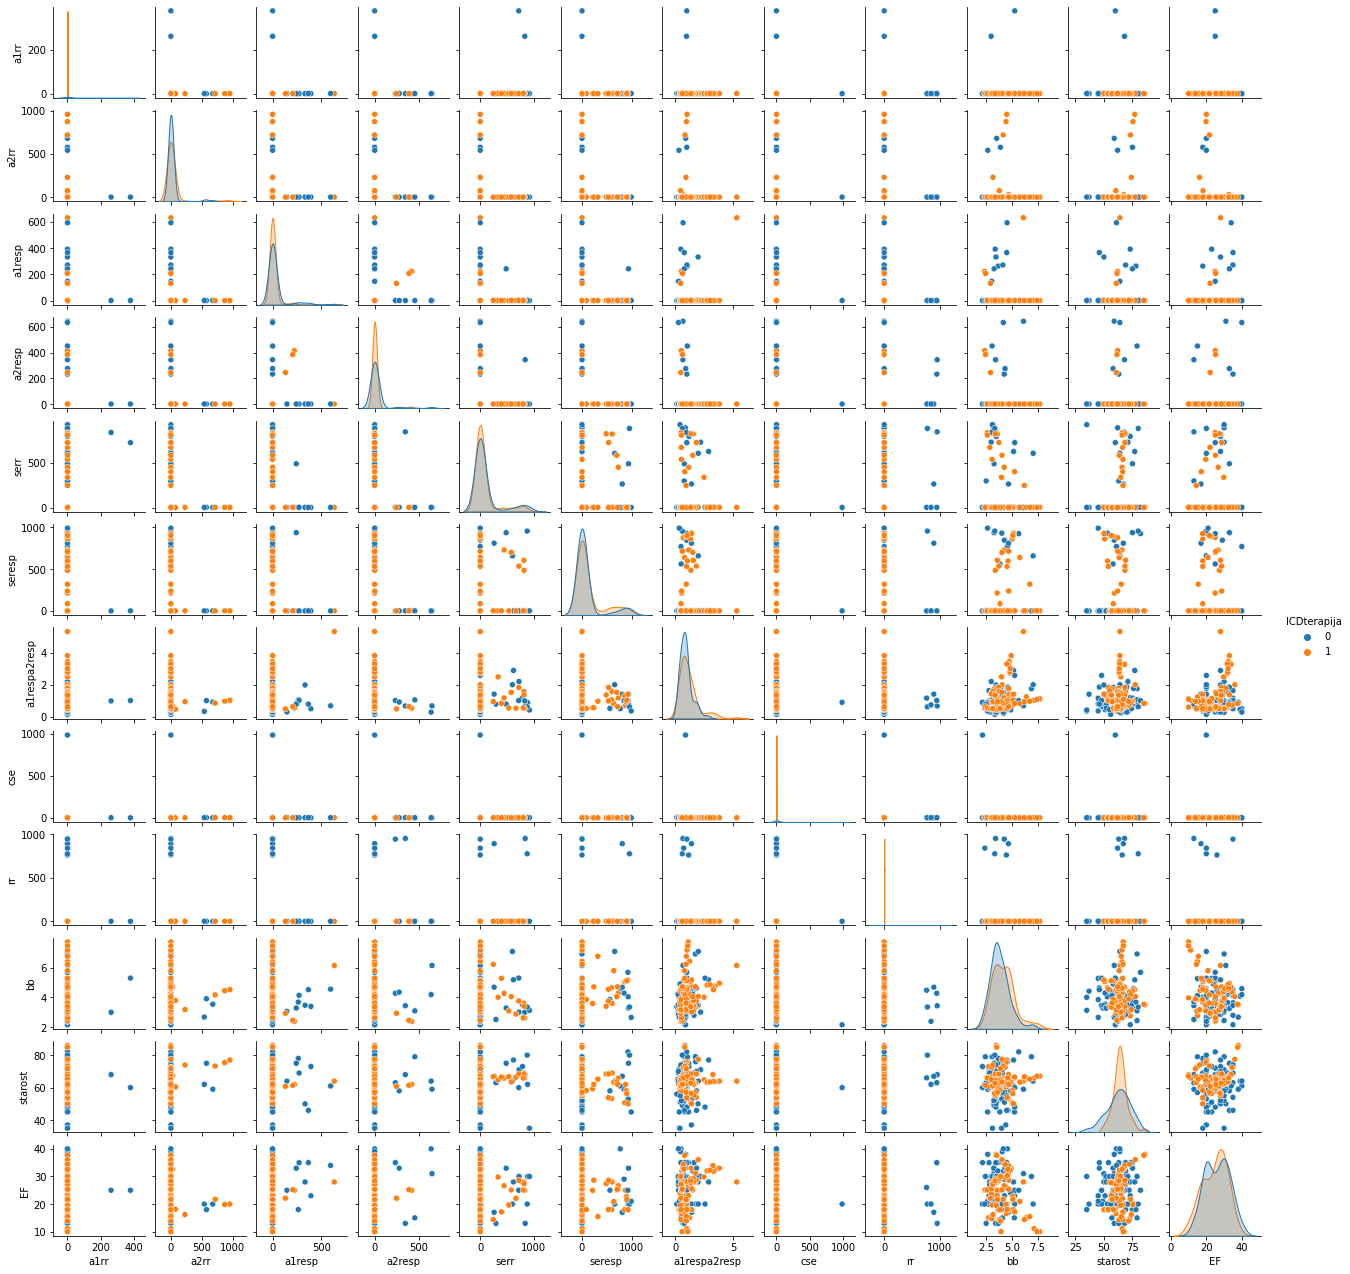

In [16]:
new_data=pd.concat([X_vt,y_res],axis=1,join="inner")
g=sns.pairplot(new_data,hue="ICDterapija",height=1.5)
g.savefig("zavisnost_podataka.png")

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_vt,y_res,train_size=0.6,stratify=y_res)


In [18]:
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

In [74]:
def decision_tree_classifier(X_train,y_train,standardize=False):
    tree_params={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12]}
    gs_dtc=GridSearchCV(DecisionTreeClassifier(),tree_params,cv=5)
    grid_res_dtc=gs_dtc.fit(X_train,y_train)
    fig=plt.figure(figsize=(12,12))
    _=plot_tree(gs_dtc.best_estimator_,feature_names=selected_attributes,filled=True)
    if not standardize:
        fig.savefig("drvo.png")   
    else:
        fig.savefig("drvo_sc.png")

    return grid_res_dtc,gs_dtc

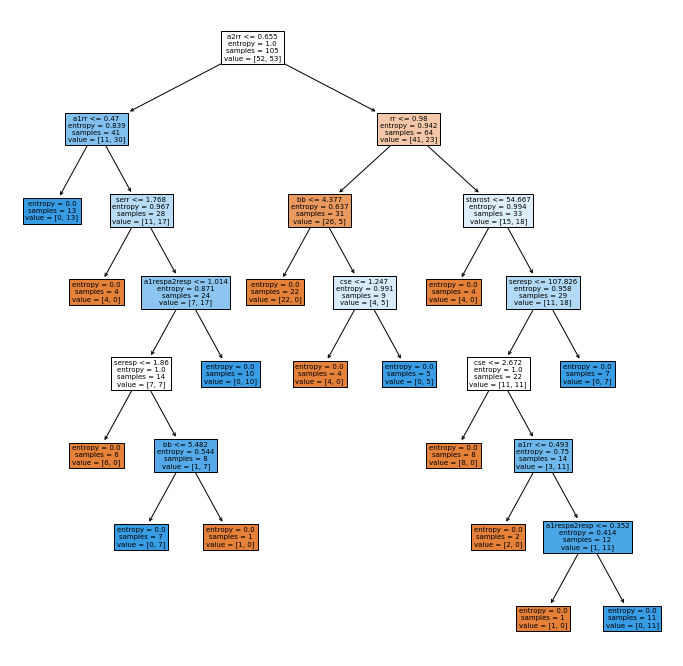

In [75]:
grid_res_dtc,gs_dtc=decision_tree_classifier(X_train,y_train)

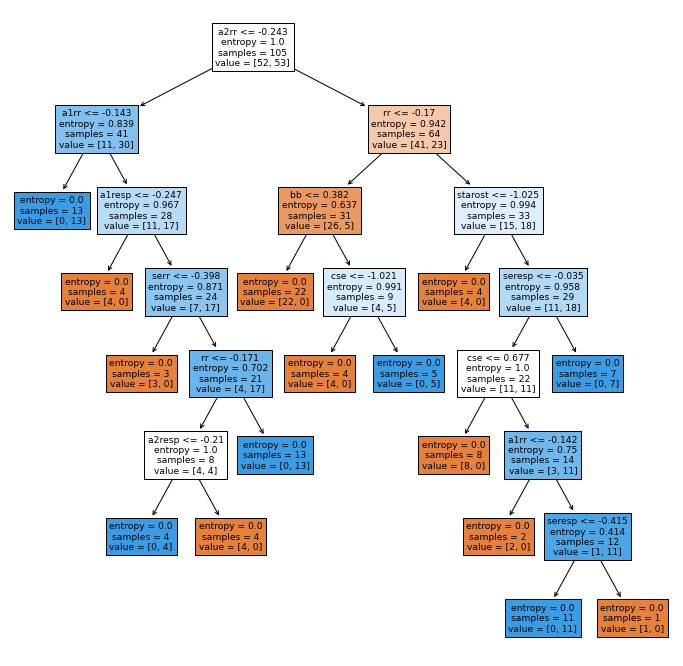

In [76]:
grid_res_dtc_sc,gs_dtc_sc=decision_tree_classifier(X_train_sc,y_train,True)

In [77]:
results=pd.DataFrame(grid_res_dtc.cv_results_)
results.to_csv("rezultati_DTC.csv")

results_sc=pd.DataFrame(grid_res_dtc_sc.cv_results_)
results_sc.to_csv("rezultati_DTC_sc.csv")

In [78]:
def dtc_rezultati(grid_res_dtc,gs_dtc,standardize=False):
    if not standardize:
        print("Najbolji rezultat (bez standardizacije): %f dobijen koriscenjem %s\n" % (gs_dtc.best_score_, gs_dtc.best_params_))
    else:
        print("Najbolji rezultat (sa standardizacijom): %f dobijen koriscenjem %s\n" % (gs_dtc.best_score_, gs_dtc.best_params_))

    means=grid_res_dtc.cv_results_['mean_test_score']
    stds=grid_res_dtc.cv_results_['std_test_score']
    params=grid_res_dtc.cv_results_['params']
    for mean,stdev,param in zip(means,stds,params):
        print("%f (%f) za: %r" %(mean,stdev,param))

In [79]:
dtc_rezultati(grid_res_dtc,gs_dtc)
print("\n")
dtc_rezultati(grid_res_dtc_sc,gs_dtc_sc,True)

Najbolji rezultat (bez standardizacije): 0.704762 dobijen koriscenjem {'criterion': 'entropy', 'max_depth': 11}

0.571429 (0.079682) za: {'criterion': 'gini', 'max_depth': 4}
0.580952 (0.076190) za: {'criterion': 'gini', 'max_depth': 5}
0.628571 (0.101686) za: {'criterion': 'gini', 'max_depth': 6}
0.628571 (0.063174) za: {'criterion': 'gini', 'max_depth': 7}
0.628571 (0.121964) za: {'criterion': 'gini', 'max_depth': 8}
0.609524 (0.132651) za: {'criterion': 'gini', 'max_depth': 9}
0.600000 (0.083027) za: {'criterion': 'gini', 'max_depth': 10}
0.609524 (0.097124) za: {'criterion': 'gini', 'max_depth': 11}
0.609524 (0.106053) za: {'criterion': 'gini', 'max_depth': 12}
0.561905 (0.076190) za: {'criterion': 'entropy', 'max_depth': 4}
0.638095 (0.077372) za: {'criterion': 'entropy', 'max_depth': 5}
0.619048 (0.085184) za: {'criterion': 'entropy', 'max_depth': 6}
0.676190 (0.106053) za: {'criterion': 'entropy', 'max_depth': 7}
0.628571 (0.092337) za: {'criterion': 'entropy', 'max_depth': 8}
0

In [80]:
print("Decision Tree Classifier rezultati:\n")
y_predict=gs_dtc.best_estimator_.predict(X_test)
print("Kvalitet predvidjanja na test skupu (bez standardizacije): %f\n" % accuracy_score(y_predict,y_test))
print("Matrica konfuzije (sa standardizacijom):\n",confusion_matrix(y_predict,y_test))
print("")
print("Razne metrike klasifikacije (bez standardizacije):\n",classification_report(y_test,y_predict))
print("\n\n")
y_predict=gs_dtc_sc.best_estimator_.predict(X_test_sc)
print("Kvalitet predvidjanja na test skupu (sa standardizacijom): %f\n" % accuracy_score(y_predict,y_test))
print("Matrica konfuzije (sa standardizacijom):\n",confusion_matrix(y_predict,y_test))
print("")
print("Razne metrike klasifikacije (sa standardizacijom):\n",classification_report(y_test,y_predict))


Decision Tree Classifier rezultati:

Kvalitet predvidjanja na test skupu (bez standardizacije): 0.704225

Matrica konfuzije (sa standardizacijom):
 [[24  9]
 [12 26]]

Razne metrike klasifikacije (bez standardizacije):
               precision    recall  f1-score   support

           0       0.73      0.67      0.70        36
           1       0.68      0.74      0.71        35

    accuracy                           0.70        71
   macro avg       0.71      0.70      0.70        71
weighted avg       0.71      0.70      0.70        71




Kvalitet predvidjanja na test skupu (sa standardizacijom): 0.746479

Matrica konfuzije (sa standardizacijom):
 [[26  8]
 [10 27]]

Razne metrike klasifikacije (sa standardizacijom):
               precision    recall  f1-score   support

           0       0.76      0.72      0.74        36
           1       0.73      0.77      0.75        35

    accuracy                           0.75        71
   macro avg       0.75      0.75      0.75      

In [26]:
def support_vector_machine(X_train,y_train):
    svm_params = [
                {
                    'kernel': ['linear'],
                    'C': [0.01, 0.1, 1, 10],
                },
                {
                    'kernel': ['rbf'],
                    'C': [0.01, 0.1, 1, 10],
                    'gamma': [0.01, 0.1, 1, 10],
                },
             ]
    gs_svm=GridSearchCV(SVC(),param_grid=svm_params,cv=5)
    grid_res_svm=gs_svm.fit(X_train,y_train)
    return grid_res_svm,gs_svm

In [27]:
grid_res_svm,gs_svm=support_vector_machine(X_train,y_train)
grid_res_svm_sc,gs_svm_sc=support_vector_machine(X_train_sc,y_train)

In [28]:
results=pd.DataFrame(grid_res_svm.cv_results_)
results.to_csv("rezultati_SVM.csv")

results_sc=pd.DataFrame(grid_res_svm_sc.cv_results_)
results_sc.to_csv("rezultati_SVM_sc.csv")

In [29]:
def svm_rezultati(grid_res_svm,gs_svm,standardize=False):
    if not standardize:
        print("Najbolji rezultat (bez standardizacije): %f dobijen koriscenjem %s\n" % (gs_svm.best_score_, gs_svm.best_params_))
    else:
        print("Najbolji rezultat (sa standardizacijom): %f dobijen koriscenjem %s\n" % (gs_svm.best_score_, gs_svm.best_params_))
    means=grid_res_svm.cv_results_['mean_test_score']
    stds=grid_res_svm.cv_results_['std_test_score']
    params=grid_res_svm.cv_results_['params']
    for mean,stdev,param in zip(means,stds,params):
        print("%f (%f) za: %r" %(mean,stdev,param))

In [30]:
svm_rezultati(grid_res_svm,gs_svm)
print("\n")
svm_rezultati(grid_res_svm_sc,gs_svm_sc,True)

Najbolji rezultat (bez standardizacije): 0.628571 dobijen koriscenjem {'C': 1, 'gamma': 1, 'kernel': 'rbf'}

0.514286 (0.055533) za: {'C': 0.01, 'kernel': 'linear'}
0.600000 (0.064594) za: {'C': 0.1, 'kernel': 'linear'}
0.600000 (0.048562) za: {'C': 1, 'kernel': 'linear'}
0.571429 (0.067344) za: {'C': 10, 'kernel': 'linear'}
0.571429 (0.079682) za: {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.561905 (0.106053) za: {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.514286 (0.055533) za: {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.504762 (0.038095) za: {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
0.571429 (0.079682) za: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.561905 (0.106053) za: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.514286 (0.055533) za: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.504762 (0.038095) za: {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.590476 (0.077372) za: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.619048 (0.067344) za: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.628571 (0.0761

In [31]:
print("Support Vector Machine rezultati:\n")
y_predict=gs_svm.best_estimator_.predict(X_test)
print("Kvalitet predvidjanja na test skupu (bez standardizacije): %f\n" % accuracy_score(y_predict,y_test))
print("Matrica konfuzije (sa standardizacijom):\n",confusion_matrix(y_predict,y_test))
print("")
print("Razne metrike klasifikacije (bez standardizacije):\n",classification_report(y_test,y_predict))
print("\n\n")
y_predict=gs_svm_sc.best_estimator_.predict(X_test_sc)
print("Kvalitet predvidjanja na test skupu (sa standardizacijom): %f\n" % accuracy_score(y_predict,y_test))
print("Matrica konfuzije (sa standardizacijom):\n",confusion_matrix(y_predict,y_test))
print("")
print("Razne metrike klasifikacije (sa standardizacijom):\n",classification_report(y_test,y_predict))


Support Vector Machine rezultati:

Kvalitet predvidjanja na test skupu (bez standardizacije): 0.704225

Matrica konfuzije (sa standardizacijom):
 [[35 20]
 [ 1 15]]

Razne metrike klasifikacije (bez standardizacije):
               precision    recall  f1-score   support

           0       0.64      0.97      0.77        36
           1       0.94      0.43      0.59        35

    accuracy                           0.70        71
   macro avg       0.79      0.70      0.68        71
weighted avg       0.78      0.70      0.68        71




Kvalitet predvidjanja na test skupu (sa standardizacijom): 0.929577

Matrica konfuzije (sa standardizacijom):
 [[34  3]
 [ 2 32]]

Razne metrike klasifikacije (sa standardizacijom):
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        36
           1       0.94      0.91      0.93        35

    accuracy                           0.93        71
   macro avg       0.93      0.93      0.93        

In [32]:
nb_model=MultinomialNB()
sample = class_weight.compute_sample_weight('balanced', y_train)
nb_model.fit(X_train,y_train,sample_weight=sample)
print("score: %f" % nb_model.score(X_train,y_train))

score: 0.676190


In [33]:
print("Naive Bayes rezultati")
print("Najbolji rezultat: %f\n" % nb_model.score(X_train,y_train))
y_predict=nb_model.predict(X_test)
print("Kvalitet predvidjanja na test skupu: %f\n" % accuracy_score(y_predict,y_test))
print("Matrica konfuzije:\n",confusion_matrix(y_predict,y_test))
print("")
print("Razne metrike klasifikacije:\n",classification_report(y_predict,y_test))

Naive Bayes rezultati
Najbolji rezultat: 0.676190

Kvalitet predvidjanja na test skupu: 0.619718

Matrica konfuzije:
 [[11  2]
 [25 33]]

Razne metrike klasifikacije:
               precision    recall  f1-score   support

           0       0.31      0.85      0.45        13
           1       0.94      0.57      0.71        58

    accuracy                           0.62        71
   macro avg       0.62      0.71      0.58        71
weighted avg       0.83      0.62      0.66        71



In [34]:
def random_forest_classifier(X_train,y_train):
    rfc_params={'n_estimators':[200,500],
              'max_features':['sqrt','log2'],
              'max_depth':[4,6,8],
              'criterion':['gini','entropy']}
    gs_rfc=GridSearchCV(RandomForestClassifier(),param_grid=rfc_params,cv=5)
    grid_res_rfc=gs_rfc.fit(X_train,y_train)
    return grid_res_rfc,gs_rfc

In [35]:
grid_res_rfc,gs_rfc=random_forest_classifier(X_train,y_train)
grid_res_rfc_sc,gs_rfc_sc=random_forest_classifier(X_train_sc,y_train)

In [36]:
results=pd.DataFrame(grid_res_rfc.cv_results_)
results.to_csv("rezultati_RFC.csv")

results=pd.DataFrame(grid_res_rfc_sc.cv_results_)
results.to_csv("rezultati_RFC_sc.csv")

In [37]:
def rfc_rezultati(grid_res_rfc,gs_rfc,standardize=False):
    if not standardize:
        print("Najbolji rezultat (bez standardizacije): %f dobijen koriscenjem %s\n" % (gs_rfc.best_score_, gs_rfc.best_params_))
    else:
        print("Najbolji rezultat (sa standardizacijom): %f dobijen koriscenjem %s\n" % (gs_rfc.best_score_, gs_rfc.best_params_))
    means=grid_res_rfc.cv_results_['mean_test_score']
    stds=grid_res_rfc.cv_results_['std_test_score']
    params=grid_res_rfc.cv_results_['params']
    for mean,stdev,param in zip(means,stds,params):
        print("%f (%f) za: %r" %(mean,stdev,param))

In [81]:
rfc_rezultati(grid_res_rfc,gs_rfc)
print("\n")
rfc_rezultati(grid_res_rfc_sc,gs_rfc_sc,True)

Najbolji rezultat (bez standardizacije): 0.790476 dobijen koriscenjem {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}

0.742857 (0.098054) za: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.761905 (0.085184) za: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.733333 (0.098054) za: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.733333 (0.111066) za: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.771429 (0.139321) za: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}
0.733333 (0.088320) za: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 500}
0.723810 (0.118187) za: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 200}
0.752381 (0.106053) za: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'n_estim

In [39]:
print("Random Forest Classifier rezultati:\n")
y_predict=gs_rfc.best_estimator_.predict(X_test)
print(gs_rfc.best_estimator_)
print("Kvalitet predvidjanja na test skupu (bez standardizacije): %f\n" % accuracy_score(y_predict,y_test))
print("Matrica konfuzije (sa standardizacijom):\n",confusion_matrix(y_predict,y_test))
print("")
print("Razne metrike klasifikacije (bez standardizacije):\n",classification_report(y_test,y_predict))
print("\n\n")
y_predict=gs_rfc_sc.best_estimator_.predict(X_test_sc)
print(gs_rfc_sc.best_estimator_)
print("Kvalitet predvidjanja na test skupu (sa standardizacijom): %f\n" % accuracy_score(y_predict,y_test))
print("Matrica konfuzije (sa standardizacijom):\n",confusion_matrix(y_predict,y_test))
print("")
print("Razne metrike klasifikacije (sa standardizacijom):\n",classification_report(y_test,y_predict))


Random Forest Classifier rezultati:

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200)
Kvalitet predvidjanja na test skupu (bez standardizacije): 0.816901

Matrica konfuzije (sa standardizacijom):
 [[26  3]
 [10 32]]

Razne metrike klasifikacije (bez standardizacije):
               precision    recall  f1-score   support

           0       0.90      0.72      0.80        36
           1       0.76      0.91      0.83        35

    accuracy                           0.82        71
   macro avg       0.83      0.82      0.82        71
weighted avg       0.83      0.82      0.82        71




RandomForestClassifier(max_depth=8, n_estimators=200)
Kvalitet predvidjanja na test skupu (sa standardizacijom): 0.830986

Matrica konfuzije (sa standardizacijom):
 [[27  3]
 [ 9 32]]

Razne metrike klasifikacije (sa standardizacijom):
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.78      

In [40]:
ann=tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=16,input_shape=(12,),activation="relu"))
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# ann.fit(X_train,y_train)

In [47]:
def artificial_neural_network(X_train,y_train):
    batch_size=[32,50]
    epochs=[20,50,100]
    ann_params=dict(batch_size=batch_size,epochs=epochs)
    ann_model=KerasClassifier(model=ann)
    gs_ann=GridSearchCV(estimator=ann_model,param_grid=ann_params,cv=3)
    grid_res_ann=gs_ann.fit(X_train,y_train)
    
    return grid_res_ann,gs_ann

In [48]:
grid_res_ann,gs_ann=artificial_neural_network(X_train,y_train)
grid_res_ann_sc,gs_ann_sc=artificial_neural_network(X_train_sc,y_train)

INFO:tensorflow:Assets written to: ram://1ab2163a2d524423b1715da7a65ce0b3/assets


INFO:tensorflow:Assets written to: ram://1ab2163a2d524423b1715da7a65ce0b3/assets
2023-08-08 13:19:42.623504: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c28f12b4584e476ca9c27a39f3001183: INVALID_ARGUMENT: ram://c28f12b4584e476ca9c27a39f3001183 is a directory.


INFO:tensorflow:Assets written to: ram://a33ad18694f74a9abe1dd19b89a23690/assets


INFO:tensorflow:Assets written to: ram://a33ad18694f74a9abe1dd19b89a23690/assets


Epoch 1/20


2023-08-08 13:19:43.419136: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d5e191471b7544a487b4505235dad8dc: INVALID_ARGUMENT: ram://d5e191471b7544a487b4505235dad8dc is a directory.


3/3 [==============================] - 0s 4ms/step - loss: 47.8094 - accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 0s 4ms/step - loss: 45.4788 - accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 0s 4ms/step - loss: 42.8089 - accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 0s 4ms/step - loss: 40.6068 - accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 0s 4ms/step - loss: 37.9754 - accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 0s 4ms/step - loss: 35.5716 - accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 0s 3ms/step - loss: 33.6005 - accuracy: 0.5000
Epoch 8/20
3/3 [==============================] - 0s 3ms/step - loss: 31.2060 - accuracy: 0.5000
Epoch 9/20
3/3 [==============================] - 0s 4ms/step - loss: 28.9308 - accuracy: 0.5000
Epoch 10/20
3/3 [==============================] - 0s 5ms/step - loss: 26.6649 - accuracy: 0.5000
Epoch 11/20
3/3 [=======================

INFO:tensorflow:Assets written to: ram://3999a1bb2aeb4757a0395135b275fea6/assets


Epoch 1/20


2023-08-08 13:19:45.143780: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://52b44e81136b44089e58865e7a6dfdf2: INVALID_ARGUMENT: ram://52b44e81136b44089e58865e7a6dfdf2 is a directory.


3/3 [==============================] - 0s 4ms/step - loss: 50.1647 - accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 0s 4ms/step - loss: 46.8237 - accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 0s 4ms/step - loss: 44.2164 - accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 0s 4ms/step - loss: 41.3473 - accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 0s 4ms/step - loss: 38.9773 - accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 0s 3ms/step - loss: 36.2953 - accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 0s 3ms/step - loss: 33.6462 - accuracy: 0.5000
Epoch 8/20
3/3 [==============================] - 0s 3ms/step - loss: 31.2756 - accuracy: 0.5000
Epoch 9/20
3/3 [==============================] - 0s 3ms/step - loss: 28.8381 - accuracy: 0.5000
Epoch 10/20
3/3 [==============================] - 0s 3ms/step - loss: 26.4592 - accuracy: 0.5000
Epoch 11/20
3/3 [=======================

INFO:tensorflow:Assets written to: ram://78ec6c3ff0624aab84c1a948542f49fb/assets
2023-08-08 13:19:46.490208: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://af87f6810758475bab29903b449f3a8d: INVALID_ARGUMENT: ram://af87f6810758475bab29903b449f3a8d is a directory.


Epoch 1/20
3/3 [==============================] - 0s 3ms/step - loss: 48.0562 - accuracy: 0.5143
Epoch 2/20
3/3 [==============================] - 0s 3ms/step - loss: 45.0432 - accuracy: 0.5143
Epoch 3/20
3/3 [==============================] - 0s 3ms/step - loss: 42.1874 - accuracy: 0.5143
Epoch 4/20
3/3 [==============================] - 0s 3ms/step - loss: 39.6451 - accuracy: 0.5143
Epoch 5/20
3/3 [==============================] - 0s 3ms/step - loss: 37.0564 - accuracy: 0.5143
Epoch 6/20
3/3 [==============================] - 0s 3ms/step - loss: 34.7662 - accuracy: 0.5143
Epoch 7/20
3/3 [==============================] - 0s 3ms/step - loss: 32.2580 - accuracy: 0.5143
Epoch 8/20
3/3 [==============================] - 0s 3ms/step - loss: 30.0858 - accuracy: 0.5143
Epoch 9/20
3/3 [==============================] - 0s 3ms/step - loss: 28.0700 - accuracy: 0.5143
Epoch 10/20
3/3 [==============================] - 0s 3ms/step - loss: 25.8044 - accuracy: 0.5143
Epoch 11/20
3/3 [============

INFO:tensorflow:Assets written to: ram://69576afb8b9b4282a979ad97938c657f/assets


Epoch 1/50


2023-08-08 13:19:47.879216: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://0574d7001c22486082e5ede693dd130c: INVALID_ARGUMENT: ram://0574d7001c22486082e5ede693dd130c is a directory.


3/3 [==============================] - 0s 3ms/step - loss: 47.7953 - accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 3ms/step - loss: 45.0796 - accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 42.6257 - accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 39.9537 - accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 0s 4ms/step - loss: 37.5649 - accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 35.3665 - accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 33.0170 - accuracy: 0.5000
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 30.6477 - accuracy: 0.5000
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 28.5686 - accuracy: 0.5000
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 26.4279 - accuracy: 0.5000
Epoch 11/50
3/3 [=======================

INFO:tensorflow:Assets written to: ram://aaf6f228a7df4576944ffea7cb3f722b/assets


Epoch 1/50


2023-08-08 13:19:50.567290: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://c9c845dd3f23426c949b7dfc6d89e438: INVALID_ARGUMENT: ram://c9c845dd3f23426c949b7dfc6d89e438 is a directory.


3/3 [==============================] - 0s 4ms/step - loss: 50.0791 - accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 3ms/step - loss: 47.0586 - accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 44.1179 - accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 41.3435 - accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 38.3325 - accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 35.7447 - accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 33.0675 - accuracy: 0.5000
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 30.6158 - accuracy: 0.5000
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 27.9956 - accuracy: 0.5000
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 25.8800 - accuracy: 0.5000
Epoch 11/50
3/3 [=======================

INFO:tensorflow:Assets written to: ram://dd1d21d8268d44aab1dce851c590e61f/assets
2023-08-08 13:19:52.302226: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://8f052debd5074ee280ca55cfe29d0662: INVALID_ARGUMENT: ram://8f052debd5074ee280ca55cfe29d0662 is a directory.


Epoch 1/50
3/3 [==============================] - 0s 4ms/step - loss: 48.1760 - accuracy: 0.5143
Epoch 2/50
3/3 [==============================] - 0s 4ms/step - loss: 45.3052 - accuracy: 0.5143
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 42.9977 - accuracy: 0.5143
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 40.1475 - accuracy: 0.5143
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 37.8359 - accuracy: 0.5143
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 35.2145 - accuracy: 0.5143
Epoch 7/50
3/3 [==============================] - 0s 3ms/step - loss: 32.8745 - accuracy: 0.5143
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 30.7942 - accuracy: 0.5143
Epoch 9/50
3/3 [==============================] - 0s 3ms/step - loss: 28.3883 - accuracy: 0.5143
Epoch 10/50
3/3 [==============================] - 0s 5ms/step - loss: 26.1976 - accuracy: 0.5143
Epoch 11/50
3/3 [============

INFO:tensorflow:Assets written to: ram://75e5b69d94b741018d41318d88f3736d/assets


INFO:tensorflow:Assets written to: ram://75e5b69d94b741018d41318d88f3736d/assets
2023-08-08 13:19:55.379275: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://014ed83203bc4d2292d5872fdc343dfe: INVALID_ARGUMENT: ram://014ed83203bc4d2292d5872fdc343dfe is a directory.


Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 47.8877 - accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 45.2764 - accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 42.6812 - accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 40.1701 - accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 37.2812 - accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 35.1687 - accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 32.7353 - accuracy: 0.5000
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 30.2528 - accuracy: 0.5000
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 28.0386 - accuracy: 0.5000
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 25.9070 - accuracy: 0.5000
Epoch 11/100
3/3 [=

INFO:tensorflow:Assets written to: ram://927d174f375c4b749beefc9c43e583ea/assets


Epoch 1/100


2023-08-08 13:19:57.869961: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://572c8a9321574208835fe45fff2b517d: INVALID_ARGUMENT: ram://572c8a9321574208835fe45fff2b517d is a directory.


3/3 [==============================] - 0s 3ms/step - loss: 50.2674 - accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 46.8381 - accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 44.1807 - accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 41.3708 - accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 38.6110 - accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 3ms/step - loss: 35.9423 - accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 33.0451 - accuracy: 0.5000
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 30.6947 - accuracy: 0.5000
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 28.3612 - accuracy: 0.5000
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 25.9937 - accuracy: 0.5000
Epoch 11/100
3/3 [=============

INFO:tensorflow:Assets written to: ram://ea3e3d2fe0f848898cdb5e7e12c28692/assets


Epoch 1/100


2023-08-08 13:20:00.316664: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://424318b774ec47a78616370992e80f7b: INVALID_ARGUMENT: ram://424318b774ec47a78616370992e80f7b is a directory.


3/3 [==============================] - 0s 3ms/step - loss: 47.9555 - accuracy: 0.5143
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 45.1293 - accuracy: 0.5143
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 42.4038 - accuracy: 0.5143
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 39.6332 - accuracy: 0.5143
Epoch 5/100
3/3 [==============================] - 0s 3ms/step - loss: 37.1914 - accuracy: 0.5143
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 34.6845 - accuracy: 0.5143
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 32.1436 - accuracy: 0.5143
Epoch 8/100
3/3 [==============================] - 0s 3ms/step - loss: 29.8116 - accuracy: 0.5143
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 27.6147 - accuracy: 0.5143
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 25.3818 - accuracy: 0.5143
Epoch 11/100
3/3 [=============

INFO:tensorflow:Assets written to: ram://79608f35cafe4607b14300076fc18166/assets


Epoch 1/20


2023-08-08 13:20:02.895135: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4cc653a0a8f740a59f0ee1144b3256b5: INVALID_ARGUMENT: ram://4cc653a0a8f740a59f0ee1144b3256b5 is a directory.


2/2 [==============================] - 0s 5ms/step - loss: 48.2255 - accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 0s 6ms/step - loss: 46.2394 - accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 44.1867 - accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 42.1751 - accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 40.3970 - accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 0s 6ms/step - loss: 38.4327 - accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 0s 5ms/step - loss: 36.4451 - accuracy: 0.5000
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 34.6856 - accuracy: 0.5000
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 32.8206 - accuracy: 0.5000
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 31.2124 - accuracy: 0.5000
Epoch 11/20
2/2 [=======================

INFO:tensorflow:Assets written to: ram://97fe9ad1d13c4570947e3eecb5c105f4/assets


Epoch 1/20


2023-08-08 13:20:04.319620: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://021a904b0f1b4292afe0f43f5848bbdd: INVALID_ARGUMENT: ram://021a904b0f1b4292afe0f43f5848bbdd is a directory.


2/2 [==============================] - 0s 5ms/step - loss: 50.4100 - accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 48.0971 - accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 46.0870 - accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 44.0431 - accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 41.7575 - accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 0s 6ms/step - loss: 39.8688 - accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 37.7949 - accuracy: 0.5000
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 35.9373 - accuracy: 0.5000
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 34.0617 - accuracy: 0.5000
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 32.1898 - accuracy: 0.5000
Epoch 11/20
2/2 [=======================

INFO:tensorflow:Assets written to: ram://888def091a734ce781eddb8f07933486/assets


Epoch 1/20


2023-08-08 13:20:05.675862: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://69b179d9df404682beb0bc0fa95b1348: INVALID_ARGUMENT: ram://69b179d9df404682beb0bc0fa95b1348 is a directory.


2/2 [==============================] - 0s 5ms/step - loss: 48.3180 - accuracy: 0.5143
Epoch 2/20
2/2 [==============================] - 0s 7ms/step - loss: 46.2737 - accuracy: 0.5143
Epoch 3/20
2/2 [==============================] - 0s 7ms/step - loss: 44.3309 - accuracy: 0.5143
Epoch 4/20
2/2 [==============================] - 0s 8ms/step - loss: 42.2826 - accuracy: 0.5143
Epoch 5/20
2/2 [==============================] - 0s 7ms/step - loss: 40.5294 - accuracy: 0.5143
Epoch 6/20
2/2 [==============================] - 0s 7ms/step - loss: 38.5735 - accuracy: 0.5143
Epoch 7/20
2/2 [==============================] - 0s 6ms/step - loss: 36.8520 - accuracy: 0.5143
Epoch 8/20
2/2 [==============================] - 0s 9ms/step - loss: 34.9553 - accuracy: 0.5143
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 33.1704 - accuracy: 0.5143
Epoch 10/20
2/2 [==============================] - 0s 7ms/step - loss: 31.3234 - accuracy: 0.5143
Epoch 11/20
2/2 [=======================

INFO:tensorflow:Assets written to: ram://0499d356fbdb40da86154fe26fa280eb/assets
2023-08-08 13:20:07.411605: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://a7361c0fe6b5422aa5a394836d95ed3c: INVALID_ARGUMENT: ram://a7361c0fe6b5422aa5a394836d95ed3c is a directory.


Epoch 1/50
2/2 [==============================] - 1s 5ms/step - loss: 48.2289 - accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 6ms/step - loss: 46.4025 - accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 15ms/step - loss: 44.5656 - accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 42.6049 - accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 40.6155 - accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 15ms/step - loss: 39.1710 - accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 37.0975 - accuracy: 0.5000
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 35.5042 - accuracy: 0.5000
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 33.6648 - accuracy: 0.5000
Epoch 10/50
2/2 [==============================] - 0s 5ms/step - loss: 31.9072 - accuracy: 0.5000
Epoch 11/50
2/2 [==========

INFO:tensorflow:Assets written to: ram://9f0b35a3dc9e4589a5877056b4a7e085/assets


Epoch 1/50


2023-08-08 13:20:09.680022: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://8d5caf9cd63f4282b06d59db082771fe: INVALID_ARGUMENT: ram://8d5caf9cd63f4282b06d59db082771fe is a directory.


2/2 [==============================] - 1s 8ms/step - loss: 50.2949 - accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 47.9393 - accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 13ms/step - loss: 45.9040 - accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 43.8778 - accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 41.5667 - accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 39.7405 - accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 6ms/step - loss: 37.7995 - accuracy: 0.5000
Epoch 8/50
2/2 [==============================] - 0s 10ms/step - loss: 35.9351 - accuracy: 0.5000
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 34.0251 - accuracy: 0.5000
Epoch 10/50
2/2 [==============================] - 0s 6ms/step - loss: 32.1097 - accuracy: 0.5000
Epoch 11/50
2/2 [=====================

INFO:tensorflow:Assets written to: ram://77646a9f3c7e4ff7a06c75fcdfd1935f/assets


Epoch 1/50


2023-08-08 13:20:11.747284: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://7870d4f723de4fa6942ed2ad27a14a7b: INVALID_ARGUMENT: ram://7870d4f723de4fa6942ed2ad27a14a7b is a directory.


2/2 [==============================] - 0s 5ms/step - loss: 48.3815 - accuracy: 0.5143
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 46.3755 - accuracy: 0.5143
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 44.2922 - accuracy: 0.5143
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 42.3861 - accuracy: 0.5143
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 40.3227 - accuracy: 0.5143
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 38.5048 - accuracy: 0.5143
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 36.4732 - accuracy: 0.5143
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 34.7184 - accuracy: 0.5143
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 32.9241 - accuracy: 0.5143
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 31.0360 - accuracy: 0.5143
Epoch 11/50
2/2 [=======================

INFO:tensorflow:Assets written to: ram://7ef6a9f99f784ca3830b55bebeb6b8fb/assets


Epoch 1/100


2023-08-08 13:20:13.526844: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://9f0c8d08d3214ebf8e96ac1026dbb045: INVALID_ARGUMENT: ram://9f0c8d08d3214ebf8e96ac1026dbb045 is a directory.


2/2 [==============================] - 0s 6ms/step - loss: 48.4696 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 46.2918 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 44.5107 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 42.6379 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 40.5978 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 38.7252 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 36.9505 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 35.1145 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 33.1300 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 31.4699 - accuracy: 0.5000
Epoch 11/100
2/2 [=============

INFO:tensorflow:Assets written to: ram://62cfcc21078f4c7693c8989e14fed77e/assets


Epoch 1/100


2023-08-08 13:20:16.625963: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://7e5090cb71d14e218700badd4625bddd: INVALID_ARGUMENT: ram://7e5090cb71d14e218700badd4625bddd is a directory.


2/2 [==============================] - 1s 5ms/step - loss: 50.3823 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 48.3681 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 46.2566 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 44.0011 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 42.2887 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 40.3052 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 38.3977 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 36.5183 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 34.5005 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 32.8707 - accuracy: 0.5000
Epoch 11/100
2/2 [============

INFO:tensorflow:Assets written to: ram://249b8a16d17c4bf5b45b040ef9ce7c31/assets


Epoch 1/100


2023-08-08 13:20:19.391416: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://917ea47ebc6d477e95665e917ed3169c: INVALID_ARGUMENT: ram://917ea47ebc6d477e95665e917ed3169c is a directory.


2/2 [==============================] - 1s 6ms/step - loss: 48.3705 - accuracy: 0.5143
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 46.4522 - accuracy: 0.5143
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 44.3247 - accuracy: 0.5143
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 42.5479 - accuracy: 0.5143
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 40.6542 - accuracy: 0.5143
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 38.8175 - accuracy: 0.5143
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 37.0476 - accuracy: 0.5143
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 35.2140 - accuracy: 0.5143
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 33.3178 - accuracy: 0.5143
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 31.7273 - accuracy: 0.5143
Epoch 11/100
2/2 [============

INFO:tensorflow:Assets written to: ram://a0b6d043db8a486dbfa1d8c44aa8c22f/assets
2023-08-08 13:20:22.195608: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://134ee78e7f284c06b78fb12120237040: INVALID_ARGUMENT: ram://134ee78e7f284c06b78fb12120237040 is a directory.


INFO:tensorflow:Assets written to: ram://87438ea6bac64756b49a3134eaa9e277/assets


INFO:tensorflow:Assets written to: ram://87438ea6bac64756b49a3134eaa9e277/assets


Epoch 1/100


2023-08-08 13:20:23.151798: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5f82f8e0989746fb9dbde275a297090f: INVALID_ARGUMENT: ram://5f82f8e0989746fb9dbde275a297090f is a directory.


4/4 [==============================] - 1s 5ms/step - loss: 48.1732 - accuracy: 0.5048
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 44.8401 - accuracy: 0.5048
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 41.1001 - accuracy: 0.5048
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 37.5179 - accuracy: 0.5048
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 34.1103 - accuracy: 0.5048
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 31.1488 - accuracy: 0.5048
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 28.0108 - accuracy: 0.5048
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 24.6619 - accuracy: 0.5048
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 21.4323 - accuracy: 0.5048
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 18.6472 - accuracy: 0.5048
Epoch 11/100
4/4 [=============

INFO:tensorflow:Assets written to: ram://7a985111cc8f4b73b6b29ea0fd21e8dc/assets
2023-08-08 13:20:27.027220: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://71c5c7d91882469c97733b35decb1615: INVALID_ARGUMENT: ram://71c5c7d91882469c97733b35decb1615 is a directory.


INFO:tensorflow:Assets written to: ram://c0a5c17c965945b99539c6181f513409/assets


INFO:tensorflow:Assets written to: ram://c0a5c17c965945b99539c6181f513409/assets


Epoch 1/20


2023-08-08 13:20:27.724380: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5dc403eb0736411ebfe591c0e26ffbe9: INVALID_ARGUMENT: ram://5dc403eb0736411ebfe591c0e26ffbe9 is a directory.


3/3 [==============================] - 0s 4ms/step - loss: 0.9231 - accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 0s 6ms/step - loss: 0.9037 - accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 0s 5ms/step - loss: 0.8875 - accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 0s 6ms/step - loss: 0.8733 - accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 0s 5ms/step - loss: 0.8596 - accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 0s 7ms/step - loss: 0.8467 - accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 0s 7ms/step - loss: 0.8359 - accuracy: 0.5000
Epoch 8/20
3/3 [==============================] - 0s 3ms/step - loss: 0.8252 - accuracy: 0.5000
Epoch 9/20
3/3 [==============================] - 0s 4ms/step - loss: 0.8155 - accuracy: 0.5000
Epoch 10/20
3/3 [==============================] - 0s 6ms/step - loss: 0.8055 - accuracy: 0.4857
Epoch 11/20
3/3 [==============================] -

INFO:tensorflow:Assets written to: ram://253ae4e757d74801b426c01b0f15d2d6/assets


Epoch 1/20


2023-08-08 13:20:29.786993: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://58fca8da11a04ca7ad406f7f355643f0: INVALID_ARGUMENT: ram://58fca8da11a04ca7ad406f7f355643f0 is a directory.


3/3 [==============================] - 0s 6ms/step - loss: 0.9437 - accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 0s 4ms/step - loss: 0.9230 - accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 0s 7ms/step - loss: 0.9064 - accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 0s 6ms/step - loss: 0.8898 - accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 0s 5ms/step - loss: 0.8753 - accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 0s 5ms/step - loss: 0.8615 - accuracy: 0.5000
Epoch 7/20
3/3 [==============================] - 0s 6ms/step - loss: 0.8490 - accuracy: 0.5000
Epoch 8/20
3/3 [==============================] - 0s 7ms/step - loss: 0.8386 - accuracy: 0.5000
Epoch 9/20
3/3 [==============================] - 0s 5ms/step - loss: 0.8260 - accuracy: 0.5000
Epoch 10/20
3/3 [==============================] - 0s 5ms/step - loss: 0.8158 - accuracy: 0.5000
Epoch 11/20
3/3 [==============================] -

INFO:tensorflow:Assets written to: ram://eadddd90ab8443c5ba01e1d2611d9afa/assets


Epoch 1/20


2023-08-08 13:20:31.527136: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://03c676249ce543b18081c43955213699: INVALID_ARGUMENT: ram://03c676249ce543b18081c43955213699 is a directory.


3/3 [==============================] - 0s 4ms/step - loss: 0.8899 - accuracy: 0.5143
Epoch 2/20
3/3 [==============================] - 0s 6ms/step - loss: 0.8758 - accuracy: 0.5143
Epoch 3/20
3/3 [==============================] - 0s 4ms/step - loss: 0.8603 - accuracy: 0.5143
Epoch 4/20
3/3 [==============================] - 0s 5ms/step - loss: 0.8484 - accuracy: 0.5143
Epoch 5/20
3/3 [==============================] - 0s 6ms/step - loss: 0.8375 - accuracy: 0.5143
Epoch 6/20
3/3 [==============================] - 0s 6ms/step - loss: 0.8261 - accuracy: 0.5143
Epoch 7/20
3/3 [==============================] - 0s 6ms/step - loss: 0.8156 - accuracy: 0.5143
Epoch 8/20
3/3 [==============================] - 0s 5ms/step - loss: 0.8071 - accuracy: 0.5143
Epoch 9/20
3/3 [==============================] - 0s 6ms/step - loss: 0.7984 - accuracy: 0.5143
Epoch 10/20
3/3 [==============================] - 0s 4ms/step - loss: 0.7912 - accuracy: 0.5143
Epoch 11/20
3/3 [==============================] -

INFO:tensorflow:Assets written to: ram://44a74a2acd814c01a43e2a46ed25d0d5/assets


Epoch 1/50


2023-08-08 13:20:33.114234: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://fa9cee42044d4caaa1f1673b8dc2e606: INVALID_ARGUMENT: ram://fa9cee42044d4caaa1f1673b8dc2e606 is a directory.


3/3 [==============================] - 1s 9ms/step - loss: 0.9227 - accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.9050 - accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 7ms/step - loss: 0.8888 - accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.8759 - accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 0s 9ms/step - loss: 0.8626 - accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 14ms/step - loss: 0.8500 - accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 0s 11ms/step - loss: 0.8361 - accuracy: 0.5000
Epoch 8/50
3/3 [==============================] - 0s 6ms/step - loss: 0.8247 - accuracy: 0.5000
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 0.8136 - accuracy: 0.4857
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 0.8036 - accuracy: 0.4857
Epoch 11/50
3/3 [==============================]

INFO:tensorflow:Assets written to: ram://930bdbd50a054e6abc6b720b1a71996d/assets


Epoch 1/50


2023-08-08 13:20:35.850681: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://41e0b25d37764bf4837d7877d6835aa6: INVALID_ARGUMENT: ram://41e0b25d37764bf4837d7877d6835aa6 is a directory.


3/3 [==============================] - 1s 4ms/step - loss: 0.9444 - accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 0s 5ms/step - loss: 0.9243 - accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 0s 6ms/step - loss: 0.9068 - accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 0.8912 - accuracy: 0.5000
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.8753 - accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 5ms/step - loss: 0.8609 - accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.8483 - accuracy: 0.5000
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 0.8344 - accuracy: 0.5000
Epoch 9/50
3/3 [==============================] - 0s 5ms/step - loss: 0.8245 - accuracy: 0.5000
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 0.8135 - accuracy: 0.5000
Epoch 11/50
3/3 [==============================] -

INFO:tensorflow:Assets written to: ram://5f3dd0f17d05443fa392b56e5c7ada58/assets


Epoch 1/50


2023-08-08 13:20:39.179475: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://fd0e856d1102463b87414689ae15cee7: INVALID_ARGUMENT: ram://fd0e856d1102463b87414689ae15cee7 is a directory.


3/3 [==============================] - 1s 4ms/step - loss: 0.8904 - accuracy: 0.5143
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.8745 - accuracy: 0.5143
Epoch 3/50
3/3 [==============================] - 0s 4ms/step - loss: 0.8616 - accuracy: 0.5143
Epoch 4/50
3/3 [==============================] - 0s 6ms/step - loss: 0.8499 - accuracy: 0.5143
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 0.8400 - accuracy: 0.5143
Epoch 6/50
3/3 [==============================] - 0s 7ms/step - loss: 0.8300 - accuracy: 0.5143
Epoch 7/50
3/3 [==============================] - 0s 5ms/step - loss: 0.8206 - accuracy: 0.5143
Epoch 8/50
3/3 [==============================] - 0s 4ms/step - loss: 0.8106 - accuracy: 0.5143
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 0.8020 - accuracy: 0.5143
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 0.7924 - accuracy: 0.5143
Epoch 11/50
3/3 [==============================] -

INFO:tensorflow:Assets written to: ram://e1c5a12fb2544b24a6623a361c24e397/assets


Epoch 1/100


2023-08-08 13:20:43.064398: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://dd41841068f3472ca5c316efdbb6d628: INVALID_ARGUMENT: ram://dd41841068f3472ca5c316efdbb6d628 is a directory.


3/3 [==============================] - 1s 4ms/step - loss: 0.9216 - accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 0.9058 - accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8898 - accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8763 - accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8636 - accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.8493 - accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.8383 - accuracy: 0.5000
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 0.8263 - accuracy: 0.5000
Epoch 9/100
3/3 [==============================] - 0s 12ms/step - loss: 0.8147 - accuracy: 0.4857
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 0.8048 - accuracy: 0.4857
Epoch 11/100
3/3 [=====================

INFO:tensorflow:Assets written to: ram://4beee1e4151e414aa559f10734034a67/assets
2023-08-08 13:20:47.518246: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://4a74ee90769748ffbbe151f38202f6ed: INVALID_ARGUMENT: ram://4a74ee90769748ffbbe151f38202f6ed is a directory.


Epoch 1/100
3/3 [==============================] - 1s 6ms/step - loss: 0.9437 - accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.9261 - accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 0.9103 - accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.8947 - accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8788 - accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 10ms/step - loss: 0.8666 - accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 0.8536 - accuracy: 0.5000
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 0.8400 - accuracy: 0.5000
Epoch 9/100
3/3 [==============================] - 0s 9ms/step - loss: 0.8291 - accuracy: 0.5000
Epoch 10/100
3/3 [==============================] - 0s 7ms/step - loss: 0.8194 - accuracy: 0.5000
Epoch 11/100
3/3 [=======

INFO:tensorflow:Assets written to: ram://ce87f2a6ecfd4eb79d52a067c42af44c/assets


Epoch 1/100


2023-08-08 13:20:52.113024: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://ced2da5e330944ceb4bad6a663a3852e: INVALID_ARGUMENT: ram://ced2da5e330944ceb4bad6a663a3852e is a directory.


3/3 [==============================] - 1s 5ms/step - loss: 0.8906 - accuracy: 0.5143
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8758 - accuracy: 0.5143
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8626 - accuracy: 0.5143
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8502 - accuracy: 0.5143
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8392 - accuracy: 0.5143
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8282 - accuracy: 0.5143
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8167 - accuracy: 0.5143
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8087 - accuracy: 0.5143
Epoch 9/100
3/3 [==============================] - 0s 8ms/step - loss: 0.7985 - accuracy: 0.5143
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7912 - accuracy: 0.5143
Epoch 11/100
3/3 [=======================

INFO:tensorflow:Assets written to: ram://a52b372c340c4b3e8163d1b988d7182e/assets


Epoch 1/20


2023-08-08 13:20:56.388834: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://73feaa5cff6947f88d38692de153da73: INVALID_ARGUMENT: ram://73feaa5cff6947f88d38692de153da73 is a directory.


2/2 [==============================] - 0s 6ms/step - loss: 0.9236 - accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.9087 - accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8966 - accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8835 - accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8727 - accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8599 - accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8493 - accuracy: 0.5000
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8409 - accuracy: 0.5000
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8297 - accuracy: 0.5000
Epoch 10/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8218 - accuracy: 0.5000
Epoch 11/20
2/2 [==============================] -

INFO:tensorflow:Assets written to: ram://0eb54820c2ca465599e17c9a0d9a7d16/assets
2023-08-08 13:20:57.876846: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://39ab97dd43c64de29187463967966af3: INVALID_ARGUMENT: ram://39ab97dd43c64de29187463967966af3 is a directory.


Epoch 1/20
2/2 [==============================] - 0s 5ms/step - loss: 0.9454 - accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.9311 - accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.9176 - accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.9036 - accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8918 - accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8799 - accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8683 - accuracy: 0.5000
Epoch 8/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8572 - accuracy: 0.5000
Epoch 9/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8481 - accuracy: 0.5000
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8377 - accuracy: 0.5000
Epoch 11/20
2/2 [======================

INFO:tensorflow:Assets written to: ram://2bdbb4db1e3c4554b8591ac44e6f36f0/assets
2023-08-08 13:20:59.258421: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5a874260236240bbb16bc474b165c8ae: INVALID_ARGUMENT: ram://5a874260236240bbb16bc474b165c8ae is a directory.


Epoch 1/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8925 - accuracy: 0.5143
Epoch 2/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8804 - accuracy: 0.5143
Epoch 3/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8700 - accuracy: 0.5143
Epoch 4/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8593 - accuracy: 0.5143
Epoch 5/20
2/2 [==============================] - 0s 5ms/step - loss: 0.8513 - accuracy: 0.5143
Epoch 6/20
2/2 [==============================] - 0s 6ms/step - loss: 0.8401 - accuracy: 0.5143
Epoch 7/20
2/2 [==============================] - 0s 7ms/step - loss: 0.8328 - accuracy: 0.5143
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8248 - accuracy: 0.5143
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8170 - accuracy: 0.5143
Epoch 10/20
2/2 [==============================] - 0s 4ms/step - loss: 0.8091 - accuracy: 0.5143
Epoch 11/20
2/2 [======================

INFO:tensorflow:Assets written to: ram://bf3e7d4b8b8d4882a30fa5db52a3a631/assets
2023-08-08 13:21:00.656173: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://69ae45af22774054b9ab05f0da4bdfbd: INVALID_ARGUMENT: ram://69ae45af22774054b9ab05f0da4bdfbd is a directory.


Epoch 1/50
2/2 [==============================] - 0s 5ms/step - loss: 0.9224 - accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 0.9094 - accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8984 - accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8854 - accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8738 - accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 6ms/step - loss: 0.8630 - accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 0.8539 - accuracy: 0.5000
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 0.8453 - accuracy: 0.5000
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8348 - accuracy: 0.5000
Epoch 10/50
2/2 [==============================] - 0s 6ms/step - loss: 0.8256 - accuracy: 0.5000
Epoch 11/50
2/2 [======================

INFO:tensorflow:Assets written to: ram://c03ddc333f764775b6f2335512015683/assets


Epoch 1/50


2023-08-08 13:21:03.166670: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://131053e91c9140ab9f23464a0d9af5f4: INVALID_ARGUMENT: ram://131053e91c9140ab9f23464a0d9af5f4 is a directory.


2/2 [==============================] - 0s 6ms/step - loss: 0.9459 - accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 0.9304 - accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 0s 6ms/step - loss: 0.9179 - accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 0.9050 - accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 0.8916 - accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8806 - accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8688 - accuracy: 0.5000
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 0.8581 - accuracy: 0.5000
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 0.8483 - accuracy: 0.5000
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 0.8373 - accuracy: 0.5000
Epoch 11/50
2/2 [==============================] -

INFO:tensorflow:Assets written to: ram://549d0f9dd8d34c899381dad6e3b0b1df/assets


Epoch 1/50


2023-08-08 13:21:05.007401: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://5e86cf046ee046b5938bf721aa488a28: INVALID_ARGUMENT: ram://5e86cf046ee046b5938bf721aa488a28 is a directory.


2/2 [==============================] - 0s 7ms/step - loss: 0.8919 - accuracy: 0.5143
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 0.8802 - accuracy: 0.5143
Epoch 3/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8700 - accuracy: 0.5143
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8592 - accuracy: 0.5143
Epoch 5/50
2/2 [==============================] - 0s 6ms/step - loss: 0.8498 - accuracy: 0.5143
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8408 - accuracy: 0.5143
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8315 - accuracy: 0.5143
Epoch 8/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8231 - accuracy: 0.5143
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 0.8161 - accuracy: 0.5143
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 0.8090 - accuracy: 0.5143
Epoch 11/50
2/2 [==============================] -

INFO:tensorflow:Assets written to: ram://f8cd79f6a9cd4d0db85caba728d9bdef/assets


Epoch 1/100


2023-08-08 13:21:07.799400: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://d510e02a573145629e8642d6f64a4730: INVALID_ARGUMENT: ram://d510e02a573145629e8642d6f64a4730 is a directory.


2/2 [==============================] - 0s 5ms/step - loss: 0.9249 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 0.9101 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8983 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8862 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8750 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8632 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8523 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8428 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8328 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8246 - accuracy: 0.5000
Epoch 11/100
2/2 [=======================

INFO:tensorflow:Assets written to: ram://d783e0b9e9184240ac85f3156d457f0e/assets


Epoch 1/100


2023-08-08 13:21:10.424551: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://39b5a1b2ad8e4df69a1a2bc4b0664df6: INVALID_ARGUMENT: ram://39b5a1b2ad8e4df69a1a2bc4b0664df6 is a directory.


2/2 [==============================] - 1s 16ms/step - loss: 0.9463 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 0.9309 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 0.9193 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 0.9049 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 0.8938 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 0.8823 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 0.8705 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 0.8605 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 0.8497 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 0.8399 - accuracy: 0.5000
Epoch 11/100
2/2 [=================

INFO:tensorflow:Assets written to: ram://20e62fbbc3194bff8b86f76c0f56505c/assets


INFO:tensorflow:Assets written to: ram://20e62fbbc3194bff8b86f76c0f56505c/assets


Epoch 1/100


2023-08-08 13:21:14.713848: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://13b040d5906b433b91ace95637f822b1: INVALID_ARGUMENT: ram://13b040d5906b433b91ace95637f822b1 is a directory.


2/2 [==============================] - 1s 8ms/step - loss: 0.8912 - accuracy: 0.5143
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8807 - accuracy: 0.5143
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8701 - accuracy: 0.5143
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8599 - accuracy: 0.5143
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8506 - accuracy: 0.5143
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 0.8413 - accuracy: 0.5143
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8329 - accuracy: 0.5143
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8250 - accuracy: 0.5143
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8169 - accuracy: 0.5143
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8094 - accuracy: 0.5143
Epoch 11/100
2/2 [=======================

INFO:tensorflow:Assets written to: ram://d0cf6dd67da94632a3070d15b201a7c5/assets
2023-08-08 13:21:18.478410: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://dbd7a1bf0abc4b018329a5c7ea01ef24: INVALID_ARGUMENT: ram://dbd7a1bf0abc4b018329a5c7ea01ef24 is a directory.


INFO:tensorflow:Assets written to: ram://a461f3121e704d9b974ab966c20062d0/assets


INFO:tensorflow:Assets written to: ram://a461f3121e704d9b974ab966c20062d0/assets


Epoch 1/100


2023-08-08 13:21:19.678224: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://1e78715e4dba469484851cda68f15b00: INVALID_ARGUMENT: ram://1e78715e4dba469484851cda68f15b00 is a directory.


4/4 [==============================] - 1s 3ms/step - loss: 0.9170 - accuracy: 0.5048
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8940 - accuracy: 0.5048
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8743 - accuracy: 0.5048
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8583 - accuracy: 0.5048
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8428 - accuracy: 0.5048
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8263 - accuracy: 0.5048
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8143 - accuracy: 0.4952
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8016 - accuracy: 0.4952
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7900 - accuracy: 0.4952
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7794 - accuracy: 0.4952
Epoch 11/100
4/4 [=======================

In [49]:
results=pd.DataFrame(grid_res_ann.cv_results_)
results.to_csv("rezultati_ANN.csv")

results_sc=pd.DataFrame(grid_res_ann_sc.cv_results_)
results_sc.to_csv("rezultati_ANN_sc.csv")

In [50]:
def ann_rezultati(grid_res_ann,gs_ann,standardize=False):
    if not standardize:
        print("Najbolji rezultat (bez standardizacije): %f dobijen koriscenjem %s\n" % (gs_ann.best_score_, gs_ann.best_params_))
    else:
        print("Najbolji rezultat (sa standardizacijom): %f dobijen koriscenjem %s\n" % (gs_ann.best_score_, gs_ann.best_params_))

    means=grid_res_ann.cv_results_['mean_test_score']
    stds=grid_res_ann.cv_results_['std_test_score']
    params=grid_res_ann.cv_results_['params']
    for mean,stdev,param in zip(means,stds,params):
        print("%f (%f) za: %r" %(mean,stdev,param))

In [51]:
ann_rezultati(grid_res_ann,gs_ann)
print("\n")
ann_rezultati(grid_res_ann_sc,gs_ann_sc,True)

Najbolji rezultat (bez standardizacije): 0.609524 dobijen koriscenjem {'batch_size': 32, 'epochs': 100}

0.495238 (0.013469) za: {'batch_size': 32, 'epochs': 20}
0.495238 (0.013469) za: {'batch_size': 32, 'epochs': 50}
0.609524 (0.035635) za: {'batch_size': 32, 'epochs': 100}
0.495238 (0.013469) za: {'batch_size': 50, 'epochs': 20}
0.466667 (0.013469) za: {'batch_size': 50, 'epochs': 50}
0.504762 (0.058709) za: {'batch_size': 50, 'epochs': 100}


Najbolji rezultat (sa standardizacijom): 0.533333 dobijen koriscenjem {'batch_size': 32, 'epochs': 100}

0.476190 (0.035635) za: {'batch_size': 32, 'epochs': 20}
0.476190 (0.013469) za: {'batch_size': 32, 'epochs': 50}
0.533333 (0.035635) za: {'batch_size': 32, 'epochs': 100}
0.466667 (0.035635) za: {'batch_size': 50, 'epochs': 20}
0.457143 (0.000000) za: {'batch_size': 50, 'epochs': 50}
0.485714 (0.000000) za: {'batch_size': 50, 'epochs': 100}


In [52]:
print("Artificial Neural Network rezultati:\n")
y_predict=gs_ann.best_estimator_.predict(X_test)
print("Kvalitet predvidjanja na test skupu (bez standardizacije): %f\n" % accuracy_score(y_predict,y_test))
print("Matrica konfuzije (sa standardizacijom):\n",confusion_matrix(y_predict,y_test))
print("")
print("Razne metrike klasifikacije (bez standardizacije):\n",classification_report(y_test,y_predict))
print("\n\n")
y_predict=gs_ann_sc.best_estimator_.predict(X_test_sc)
print("Kvalitet predvidjanja na test skupu (sa standardizacijom): %f\n" % accuracy_score(y_predict,y_test))
print("Matrica konfuzije (sa standardizacijom):\n",confusion_matrix(y_predict,y_test))
print("")
print("Razne metrike klasifikacije (sa standardizacijom):\n",classification_report(y_test,y_predict))


Artificial Neural Network rezultati:

3/3 [==============================] - 0s 4ms/step
Kvalitet predvidjanja na test skupu (bez standardizacije): 0.521127

Matrica konfuzije (sa standardizacijom):
 [[20 18]
 [16 17]]

Razne metrike klasifikacije (bez standardizacije):
               precision    recall  f1-score   support

           0       0.53      0.56      0.54        36
           1       0.52      0.49      0.50        35

    accuracy                           0.52        71
   macro avg       0.52      0.52      0.52        71
weighted avg       0.52      0.52      0.52        71




3/3 [==============================] - 0s 3ms/step
Kvalitet predvidjanja na test skupu (sa standardizacijom): 0.619718

Matrica konfuzije (sa standardizacijom):
 [[22 13]
 [14 22]]

Razne metrike klasifikacije (sa standardizacijom):
               precision    recall  f1-score   support

           0       0.63      0.61      0.62        36
           1       0.61      0.63      0.62        35



In [53]:
def create_model():
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=16,input_shape=(12,),activation="relu"))
    model.add(tf.keras.layers.Dense(units=8,activation="relu"))
    model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model


In [54]:
def artificial_neural_network_2(X_train,y_train,gs_ann):
    ann_model_2=KerasClassifier(model=create_model,loss="binary_crossentropy",epochs=gs_ann.best_params_.get('epochs'),batch_size=gs_ann.best_params_.get('batch_size'),verbose=0)
    optimizer=['SGD','RMSprop','Adagrad','Adadelta','Adam','Adamax','Nadam']
    ann_params_2=dict(optimizer=optimizer)
    gs_ann_2=GridSearchCV(estimator=ann_model_2,param_grid=ann_params_2,cv=3)
    grid_res_ann_2=gs_ann_2.fit(X_train,y_train)
    
    return grid_res_ann_2,gs_ann_2

In [55]:
grid_res_ann_2,gs_ann_2=artificial_neural_network_2(X_train,y_train,gs_ann)
grid_res_ann_sc_2,gs_ann_sc_2=artificial_neural_network_2(X_train_sc,y_train,gs_ann_sc)

In [56]:
results=pd.DataFrame(grid_res_ann_2.cv_results_)
results.to_csv("rezultati2_ANN.csv")

results_sc=pd.DataFrame(grid_res_ann_sc_2.cv_results_)
results_sc.to_csv("rezultati2_ANN_sc.csv")

In [57]:
def ann_rezultati_2(grid_res_ann,gs_ann,standardize=False):
    if not standardize:
        print("Najbolji rezultat: %f dobijen koriscenjem %s\n" % (gs_ann.best_score_, gs_ann.best_params_))
    else:
        print("Najbolji rezultat sa standardizacijom: %f dobijen koriscenjem %s\n" % (gs_ann.best_score_, gs_ann.best_params_))

    means=grid_res_ann.cv_results_['mean_test_score']
    stds=grid_res_ann.cv_results_['std_test_score']
    params=grid_res_ann.cv_results_['params']
    for mean,stdev,param in zip(means,stds,params):
        print("%f (%f) za: %r" %(mean,stdev,param))

In [58]:
ann_rezultati(grid_res_ann_2,gs_ann_2)
print("\n")
ann_rezultati(grid_res_ann_sc_2,gs_ann_sc_2,True)

Najbolji rezultat (bez standardizacije): 0.571429 dobijen koriscenjem {'optimizer': 'Adam'}

0.504762 (0.088320) za: {'optimizer': 'SGD'}
0.514286 (0.061721) za: {'optimizer': 'RMSprop'}
0.523810 (0.071270) za: {'optimizer': 'Adagrad'}
0.542857 (0.046657) za: {'optimizer': 'Adadelta'}
0.571429 (0.101686) za: {'optimizer': 'Adam'}
0.523810 (0.048562) za: {'optimizer': 'Adamax'}
0.561905 (0.013469) za: {'optimizer': 'Nadam'}


Najbolji rezultat (sa standardizacijom): 0.685714 dobijen koriscenjem {'optimizer': 'Nadam'}

0.628571 (0.000000) za: {'optimizer': 'SGD'}
0.666667 (0.142539) za: {'optimizer': 'RMSprop'}
0.657143 (0.061721) za: {'optimizer': 'Adagrad'}
0.590476 (0.067344) za: {'optimizer': 'Adadelta'}
0.590476 (0.094281) za: {'optimizer': 'Adam'}
0.676190 (0.094281) za: {'optimizer': 'Adamax'}
0.685714 (0.061721) za: {'optimizer': 'Nadam'}


In [59]:
print("Artificial Neural Network rezultati:\n")
y_predict=gs_ann_2.best_estimator_.predict(X_test)
print("Kvalitet predvidjanja na test skupu (bez standardizacije): %f\n" % accuracy_score(y_predict,y_test))
print("Matrica konfuzije (sa standardizacijom):\n",confusion_matrix(y_predict,y_test))
print("")
print("Razne metrike klasifikacije (bez standardizacije):\n",classification_report(y_test,y_predict))
print("\n\n")
y_predict=gs_ann_sc_2.best_estimator_.predict(X_test_sc)
print("Kvalitet predvidjanja na test skupu (sa standardizacijom): %f\n" % accuracy_score(y_predict,y_test))
print("Matrica konfuzije (sa standardizacijom):\n",confusion_matrix(y_predict,y_test))
print("")
print("Razne metrike klasifikacije (sa standardizacijom):\n",classification_report(y_test,y_predict))


Artificial Neural Network rezultati:

Kvalitet predvidjanja na test skupu (bez standardizacije): 0.535211

Matrica konfuzije (sa standardizacijom):
 [[18 15]
 [18 20]]

Razne metrike klasifikacije (bez standardizacije):
               precision    recall  f1-score   support

           0       0.55      0.50      0.52        36
           1       0.53      0.57      0.55        35

    accuracy                           0.54        71
   macro avg       0.54      0.54      0.53        71
weighted avg       0.54      0.54      0.53        71




Kvalitet predvidjanja na test skupu (sa standardizacijom): 0.718310

Matrica konfuzije (sa standardizacijom):
 [[25  9]
 [11 26]]

Razne metrike klasifikacije (sa standardizacijom):
               precision    recall  f1-score   support

           0       0.74      0.69      0.71        36
           1       0.70      0.74      0.72        35

    accuracy                           0.72        71
   macro avg       0.72      0.72      0.72     